# Data Cleaning

In [156]:
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [157]:
dt = pd.read_csv('shelter-animal-outcomes/train.csv')

In [158]:
dt.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [159]:
dt.shape

(26729, 10)

In [160]:
dt.dtypes

AnimalID          object
Name              object
DateTime          object
OutcomeType       object
OutcomeSubtype    object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object

In [161]:
dt.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

In [162]:
## General viwe over data

In [163]:
dt.isna().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

Explore columns

In [164]:
"""
Outcome Type is the column we want to predict based on the other features
"""

'\nOutcome Type is the column we want to predict based on the other features\n'

In [165]:
"""
As an overview the columns/ features that might have impact on the outcome and the ones I'm going to focus are:
Animal Type, Breed and Color, SexUponOutcome, AgeUponOutcome
"""

"\nAs an overview the columns/ features that might have impact on the outcome and the ones I'm going to focus are:\nAnimal Type, Breed and Color, SexUponOutcome, AgeUponOutcome\n"

# OUTCOME -- what is going to be predicted -- Supervised Learning

In [166]:

dt['OutcomeType'].isna().sum()

0

In [167]:
dt['OutcomeType'].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

(array([10769.,     0.,   197.,     0.,     0.,  1555.,     0.,  4786.,
            0.,  9422.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

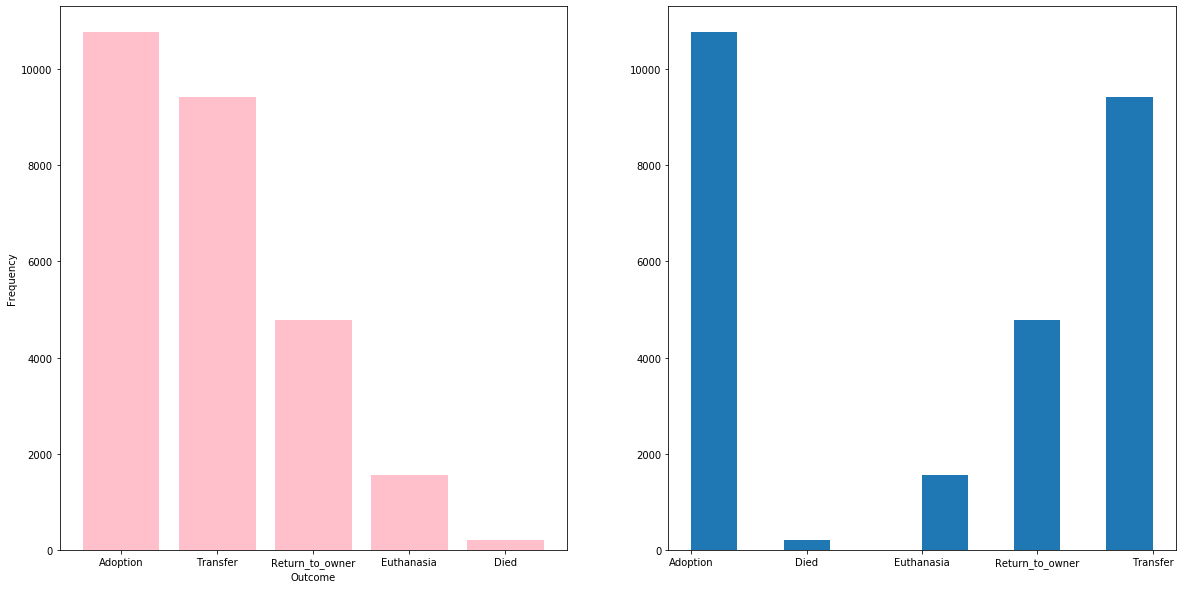

In [202]:
## Ploting Outcome

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].bar(dt['OutcomeType'].value_counts().keys(), dt['OutcomeType'].value_counts() , color = 'pink')
axs[0].set_xlabel('Outcome')
axs[0].set_ylabel('Frequency')
axs[1].hist(dt['OutcomeType'].sort_values())




# Inspect Feature OutcomeSubtype 

In [171]:
dt.OutcomeSubtype.value_counts()

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

In [173]:
out_sub = dt.OutcomeSubtype.isna().sum()

In [176]:
out_sub/dt.shape[0]

0.5092596056717423

In [ ]:
"""
More that 50% of the data is missing regarding the subtype of the outcome.

I will drop this column!!!!

"""

# Inspect Feature AnimalType 

In [178]:
dt.AnimalType.value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

<BarContainer object of 2 artists>

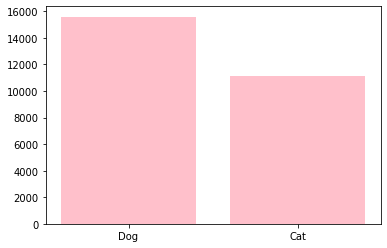

In [182]:
plt.bar(dt['AnimalType'].value_counts().keys(), dt['AnimalType'].value_counts() , color = 'pink')

# Inspect Feature Breed -- IMPORTANT FEATURE -- handle with care 

In [199]:
dt.Breed.value_counts()

Domestic Shorthair Mix                    8810
Pit Bull Mix                              1906
Chihuahua Shorthair Mix                   1766
Labrador Retriever Mix                    1363
Domestic Medium Hair Mix                   839
                                          ... 
Carolina Dog                                 1
Lhasa Apso/West Highland                     1
Queensland Heeler                            1
Australian Cattle Dog/Belgian Malinois       1
Chinese Sharpei/Basset Hound                 1
Name: Breed, Length: 1380, dtype: int64

In [ ]:
dt.Breed.value_counts() == 1  ## want to know what the unique here 

In [188]:
dt.Breed.value_counts().shape

(1380,)

In [ ]:
"""
Problably will do an hot encoding of this one 

"""